In [41]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
import openpyxl

InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 5000
pd.options.display.float_format = lambda x: '%.5f' % x
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format='svg'

In [42]:
import akshare as ak
pe_sh_df = ak.stock_market_pe_lg(symbol="上证").dropna()
pe_sh_list = pe_sh_df['平均市盈率'].tolist()
index_sh_list = pe_sh_df['指数'].tolist()
time_list = pe_sh_df['日期'].tolist()
pe_sh_rank_list=pe_sh_df['平均市盈率'].rank(pct=True,ascending=True).tolist()


Text(0.5, 0, '时间')

Text(0, 0.5, '市盈率')

Text(1, -0.15, '数据来源：akshare，截至2025年4月，不构成任何投资建议，仅供参考，制作者：NPC雷神1')

Text(0, 0.5, '上证指数')

Text(0, 0.5, '百分位')

Text(0.5, 1.0, '上证历史市盈率')

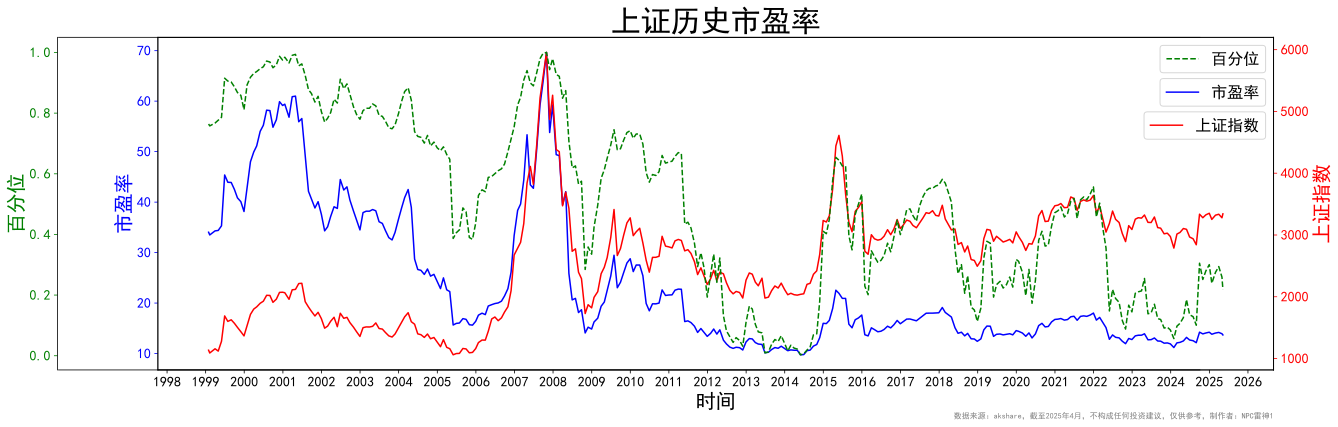

In [54]:
import matplotlib.dates as mdates
fig, ax1 = plt.subplots(figsize=(20, 6))
ax1.plot(time_list, pe_sh_list, label='市盈率', color='b')
ax1.set_xlabel('时间', fontsize=20)
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.tick_params('y', colors='b', labelsize=14)
ax1.tick_params('x', labelsize=14)
ax1.set_ylabel('市盈率', color='b', fontsize=20)
ax1.spines['bottom'].set_bounds(9200, 20000)
ax1.spines['top'].set_bounds(9200, 20000)
ax1.text(x=1,y=-0.15,s='数据来源：akshare，截至2025年4月，不构成任何投资建议，仅供参考，制作者：NPC雷神1',ha='right',va='bottom',fontsize=8,color='gray',transform=ax1.transAxes)

ax2 = ax1.twinx()
ax2.plot(time_list, index_sh_list, label='上证指数', color='r')
ax2.tick_params('y', colors='r', labelsize=14)
ax2.set_ylabel('上证指数', color='r', fontsize=20)

ax3 = ax1.twinx()
ax3.spines['left'].set_position(('axes', -0.09))
ax3.yaxis.set_ticks_position('left')
ax3.yaxis.set_label_position('left')
ax3.plot(time_list, pe_sh_rank_list, label='百分位', color='g', linestyle='--')
ax3.tick_params('y', colors='g', labelsize=14)
ax3.set_ylabel('百分位', color='g', fontsize=20)

plt.title('上证历史市盈率', fontsize=30)
ax1.legend(loc='upper right', bbox_to_anchor=(1, 0.9), fontsize=16)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.8), fontsize=16)
ax3.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=16)
plt.savefig(r'E:/jupyter/plot/pe_sh.png')
plt.show()

#